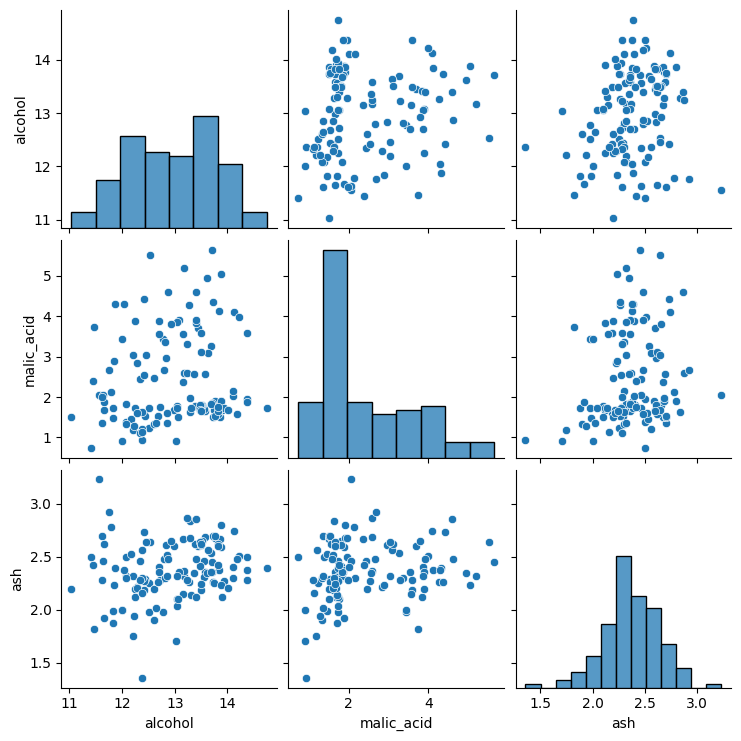

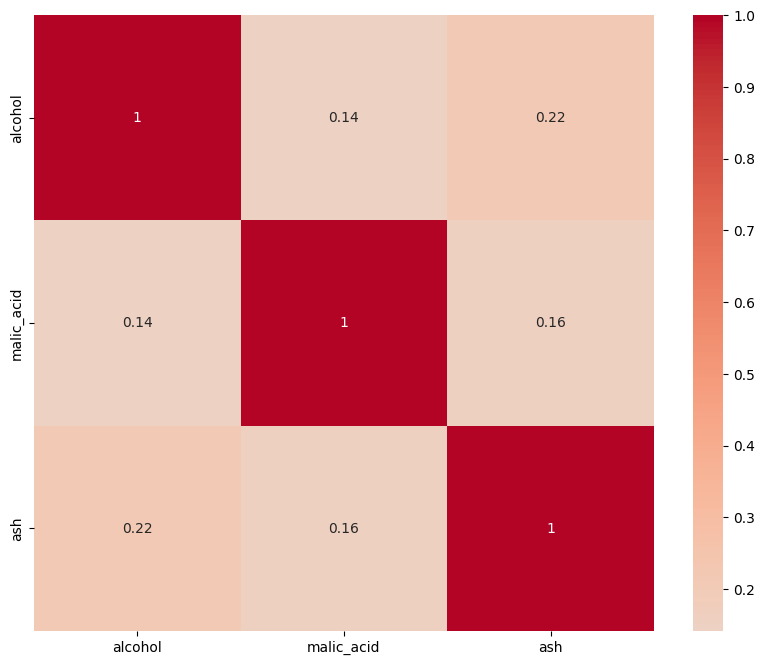

In [1]:
# Let's start with importing necessary libraries and loading the dataset

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load dataset
data = load_wine()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1, test_size=0.3)

# Convert X_train to DataFrame for better visualization
df = pd.DataFrame(X_train, columns=data.feature_names)

# Let's create a pair plot for the first 3 features
sns.pairplot(df.iloc[:,:3])
plt.show()

# Correlation heatmap for the first 3 features
plt.figure(figsize=(10,8))
sns.heatmap(df.iloc[:,:3].corr(), annot=True, cmap='coolwarm', center=0)
plt.show()


In [2]:
# Standardize the features using StandardScaler

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

# Convert standardized X_train to DataFrame for better visualization
df_std = pd.DataFrame(X_train_std, columns=data.feature_names)

# Create a DataFrame for comparison
comparison_df = pd.concat([df.describe(), df_std.describe()], 
                          keys=['Before Standardization', 'After Standardization'])

# Display comparison DataFrame
comparison_df


alcohol    malic_acid           ash  \
Before Standardization count  1.240000e+02  1.240000e+02  1.240000e+02   
                       mean   1.295298e+01  2.433306e+00  2.371935e+00   
                       std    8.096541e-01  1.144004e+00  2.750186e-01   
                       min    1.103000e+01  7.400000e-01  1.360000e+00   
                       25%    1.233750e+01  1.637500e+00  2.227500e+00   
                       50%    1.305000e+01  1.885000e+00  2.360000e+00   
                       75%    1.359000e+01  3.317500e+00  2.592500e+00   
                       max    1.475000e+01  5.650000e+00  3.230000e+00   
After Standardization  count  1.240000e+02  1.240000e+02  1.240000e+02   
                       mean   6.395198e-15 -1.418220e-15  4.372399e-15   
                       std    1.004057e+00  1.004057e+00  1.004057e+00   
                       min   -2.384704e+00 -1.486162e+00 -3.694443e+00   
                       25%   -7.632651e-01 -6.984544e-01 -5.273149e-01   
                       50%    1.203103e-01 -4.812314e-01 -4.357488e-02   
                       75%    7.899674e-01  7.760290e-01  8.052520e-01   
                       max    2.228490e+00  2.823191e+00  3.132681e+00   

                              alcalinity_of_ash     magnesium  total_phenols  \
Before Standardization count       1.240000e+02  1.240000e+02   1.240000e+02   
                       mean        1.967742e+01  9.916129e+01   2.285242e+00   
                       std         3.433357e+00  1.326122e+01   6.313020e-01   
                       min         1.060000e+01  7.000000e+01   9.800000e-01   
                       25%         1.735000e+01  8.800000e+01   1.735000e+00   
                       50%         1.950000e+01  9.800000e+01   2.335000e+00   
                       75%         2.152500e+01  1.070000e+02   2.807500e+00   
                       max         3.000000e+01  1.510000e+02   3.880000e+00   
After Standardization  count       1.240000e+02  1.240000e+02   1.240000e+02   
                       mean       -5.980879e-16  3.375436e-16   8.505741e-16   
                       std         1.004057e+00  1.004057e+00   1.004057e+00   
                       min        -2.654616e+00 -2.207911e+00  -2.075927e+00   
                       25%        -6.806345e-01 -8.450633e-01  -8.751345e-01   
                       50%        -5.188482e-02 -8.792566e-02   7.913791e-02   
                       75%         5.403096e-01  5.934982e-01   8.306274e-01   
                       max         3.018753e+00  3.924904e+00   2.536389e+00   

                                flavanoids  nonflavanoid_phenols  \
Before Standardization count  1.240000e+02          1.240000e+02   
                       mean   2.030887e+00          3.699194e-01   
                       std    1.020000e+00          1.287999e-01   
                       min    3.400000e-01          1.400000e-01   
                       25%    1.175000e+00          2.700000e-01   
                       50%    2.065000e+00          3.700000e-01   
                       75%    2.892500e+00          4.350000e-01   
                       max    5.080000e+00          6.600000e-01   
After Standardization  count  1.240000e+02          1.240000e+02   
                       mean   1.181850e-16         -5.013910e-16   
                       std    1.004057e+00          1.004057e+00   
                       min   -1.664458e+00         -1.792331e+00   
                       25%   -8.425091e-01         -7.789189e-01   
                       50%    3.357970e-02          6.286674e-04   
                       75%    8.481454e-01          5.073346e-01   
                       max    3.001453e+00          2.261317e+00   

                              proanthocyanins  color_intensity           hue  \
Before Standardization count     1.240000e+02     1.240000e+02  1.240000e+02   
                       mean      1.600081e+00     5.047903e+00  9.556129e-01   
                  

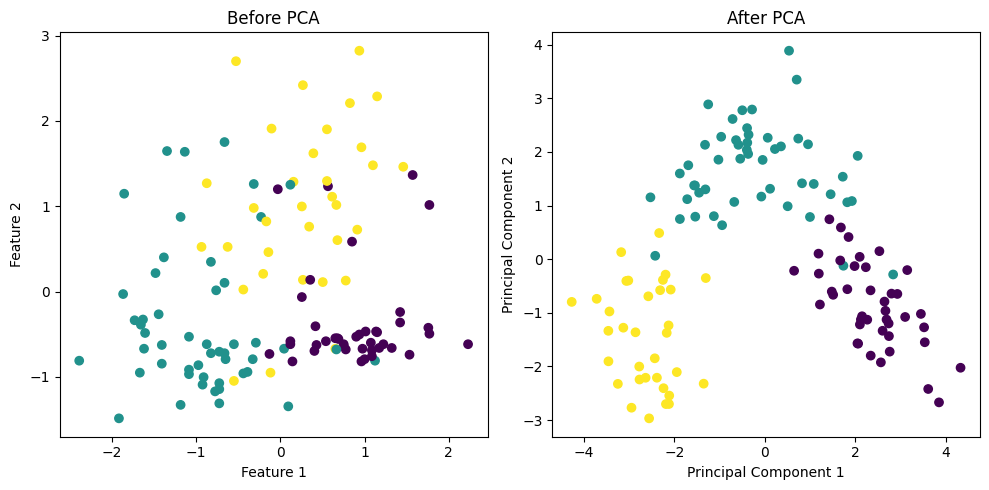

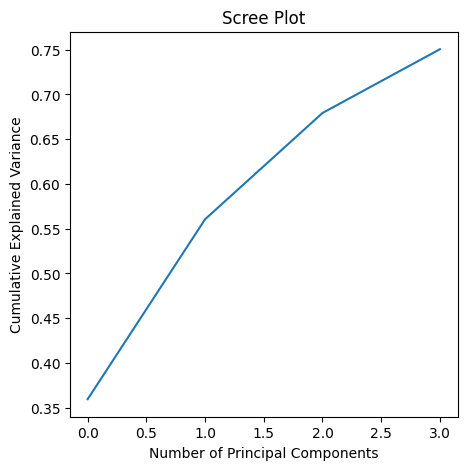

In [3]:
# Perform PCA 

pca = PCA(n_components=4) # number of principal components to keep
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Let's visualize the data before and after PCA by choosing only two features for simplicity

# Before PCA
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X_train_std[:,0], X_train_std[:,1], c=y_train)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Before PCA')

# After PCA
plt.subplot(1,2,2)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA')

plt.tight_layout()
plt.show()

# Create a scree plot
plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()


Training Accuracy:  0.9758064516129032
Testing Accuracy:  0.9629629629629629


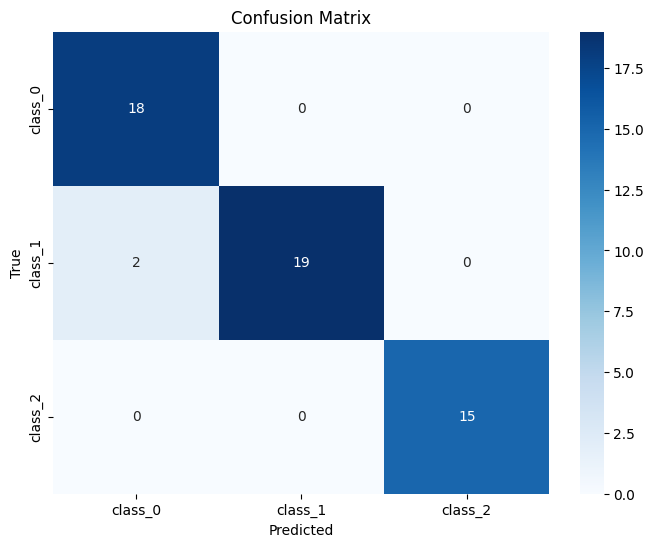

In [5]:
# Train a Logistic Regression model using the transformed data

lr = LogisticRegression()
lr.fit(X_train_pca, y_train)

# Make predictions
y_train_pred = lr.predict(X_train_pca)
y_test_pred = lr.predict(X_test_pca)

# Calculate accuracy
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

# Print accuracy
print("Training Accuracy: ", train_accuracy)
print("Testing Accuracy: ", test_accuracy)

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
